# Basic ingredients of cloud computing

## Jupyter notebook / Jupyterlab

This is where you are right now !

You can replace lab by tree to see the notebook interface instead of the lab one

Documentation and try online : https://docs.jupyter.org/en/latest/index.html

## Xarray

How to handle multi dimensional data

DataArray : dictionary-like containers of multiple arrays with multiple dimensions

You have data and metadata, coordinates for instance

Documentation and tutorial : https://tutorial.xarray.dev/intro.html

In [16]:
import xarray as xr

In [17]:
# Let's open a dataset that is sitting on the cloud
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/cmip6-feedstock/CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.zos.gn.v20190429.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    zos                 (time, j, i) float32 dask.array<chunksize=(360, 291, 360), meta=np.ndarray>
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/99be0cf0-54b1-405b-b46c-e69c274...
    variable_id:                 zos
    variant_label:               r1i1p1f1
    version:                     v20190429

In [18]:
# Total size of the dataset
ds.nbytes/1e9

0.838130124

In [19]:
# We extract one variable
ds['zos']

<xarray.DataArray 'zos' (time: 1980, j: 291, i: 360)>
dask.array<open_dataset-acf05d6877df471e3e237f134268820fzos, shape=(1980, 291, 360), dtype=float32, chunksize=(360, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    latitude   (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        zos is obtained directly from the free-surface model., CM...
    history:        sub_timeseries
    long_name:      Sea Surface Height Above Geoid
    original_name:  sossheig
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [20]:
# What is the value at a particular location
ds['zos'][0,100,100].values

array(0.51401323, dtype=float32)

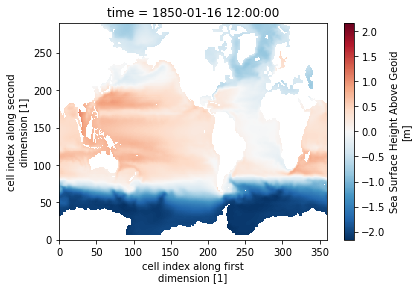

In [21]:
# We plot a map at one date
ds['zos'].isel(time=0).plot()

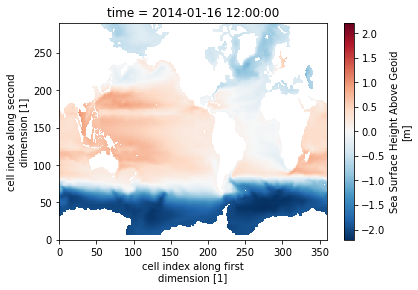

In [22]:
# We plot a map at one date
ds['zos'].sel(time="2014-01-16").plot()

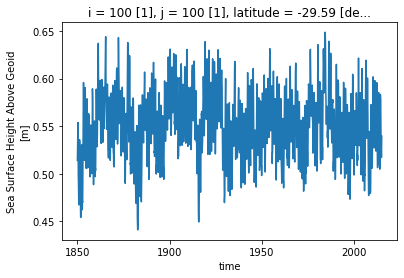

In [23]:
# A time serie at one location
ds['zos'][:,100,100].plot()

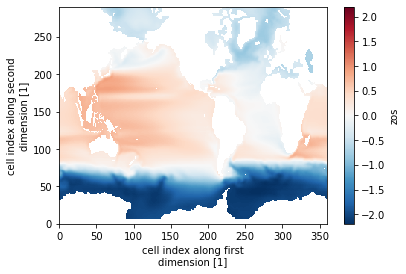

In [24]:
# The dataset is so small we can compute means without parallel computation
ds['zos'].mean(dim='time').plot()

## Intake

A package to organize, disseminate datasets.

Widely used on the cloud to handle catalogs of data.

Documentation : https://intake.readthedocs.io/en/latest/

In [25]:
from intake import open_catalog

Pangeo's online catalog https://catalog.pangeo.io/

In [26]:
# We can explore it both online and in the command line
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
list(cat)

['ocean', 'atmosphere', 'climate', 'hydro']

In [27]:
# One level down
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
list(cat)

['sea_surface_height',
 'cesm_mom6_example',
 'ECCOv4r3',
 'SOSE',
 'GODAS',
 'ECCO_layers',
 'altimetry',
 'LLC4320',
 'GFDL_CM2_6',
 'CESM_POP',
 'channel',
 'MEOM_NEMO']

In [28]:
# Now we open one dataset
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (time: 8901, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [29]:
# Total size of the dataset
ds.nbytes/1e9

516.85054194

We don't have this much memory, this time we need parallel computing

## Dask

Parallel computing in python with task scheduling on workers

Allows computation to scale from laptop to HPC, cloud

Documentation : https://docs.dask.org/en/stable/

Click on the Dask tab on the left side of jupyterlab, then +NEW

A LocalCluster has been launched, drag and drop it to the notebook below, it should look like this :

In [30]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:38509")
client

<Client: 'tcp://127.0.0.1:38509' processes=4 threads=16, memory=58.88 GiB>

Select some dashboard metrics to follow : Progress, Task Stream, Graph, CPU and Cluster Memory, and rearrange the lab windows

In [31]:
# One variable size
ds.sla.nbytes/1e9

73.8284544

In [32]:
# We only have 15Gb available but we can still handle this variable
sla_timeseries = ds.sla.mean(dim=('latitude', 'longitude'))

In [33]:
# Nothing is happenning while we do not load the computation
sla_timeseries.load()

<xarray.DataArray 'sla' (time: 8901)>
array([0.00207974, 0.00185178, 0.00166995, ..., 0.06688241, 0.06690208,
       0.0668637 ])
Coordinates:
    crs      int32 -2147483647
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15

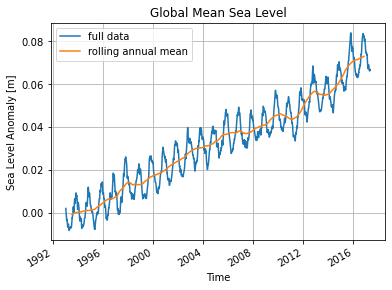

In [34]:
# Let's make a plot

import matplotlib.pyplot as plt
sla_timeseries.plot(label='full data')
sla_timeseries.rolling(time=365, center=True).mean().plot(label='rolling annual mean')
plt.ylabel('Sea Level Anomaly [m]')
plt.title('Global Mean Sea Level')
plt.legend()
plt.grid()

That is all for the basics now let's redo some computations from Takaya's paper : [spectra](Spectra-eNATL60.ipynb)